# Gaussian Mixture Models - UMAP Dataset

In [1]:
!pip install pyclustertend

## Import Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
import plotly.express as px
from sklearn.manifold import TSNE

## Load Dataset

In [3]:
umap_df = pd.read_csv('Data/umap_dataset.csv')
umap_df.columns

Index(['UMAP1', 'UMAP2', 'UMAP3', 'UMAP4', 'UMAP5', 'UMAP6', 'UMAP7', 'UMAP8',
       'UMAP9', 'UMAP10', 'UMAP11', 'UMAP12', 'UMAP13', 'UMAP14', 'UMAP15',
       'UMAP16', 'UMAP17', 'UMAP18', 'UMAP19', 'UMAP20'],
      dtype='object')

## Metrics Calculation

c:\Users\varsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\varsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\varsh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\varsh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\varsh\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

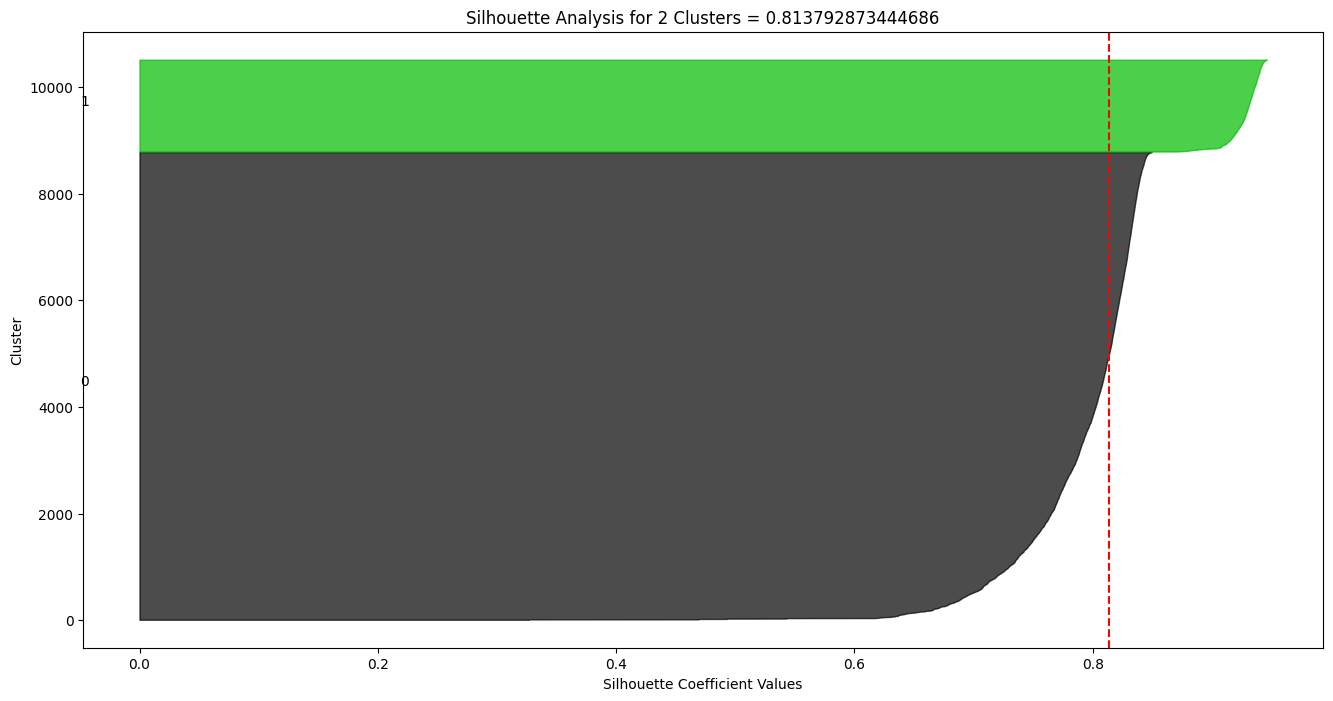

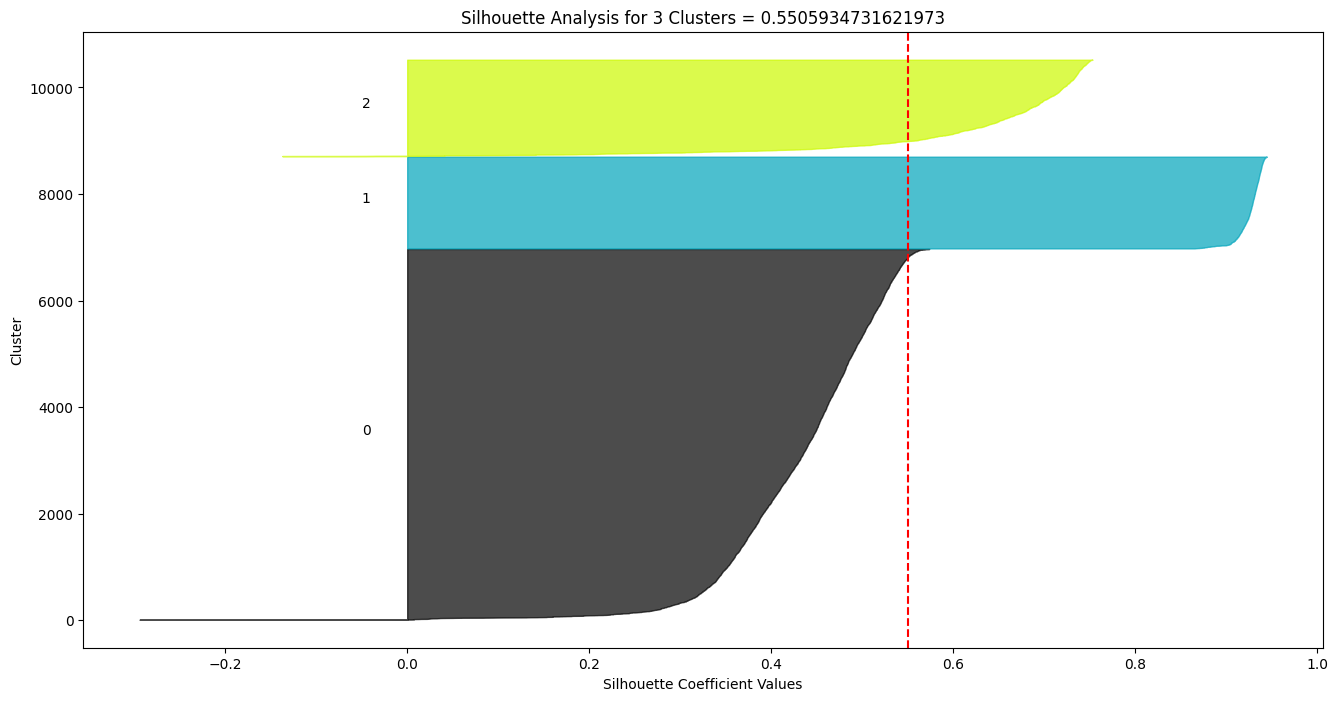

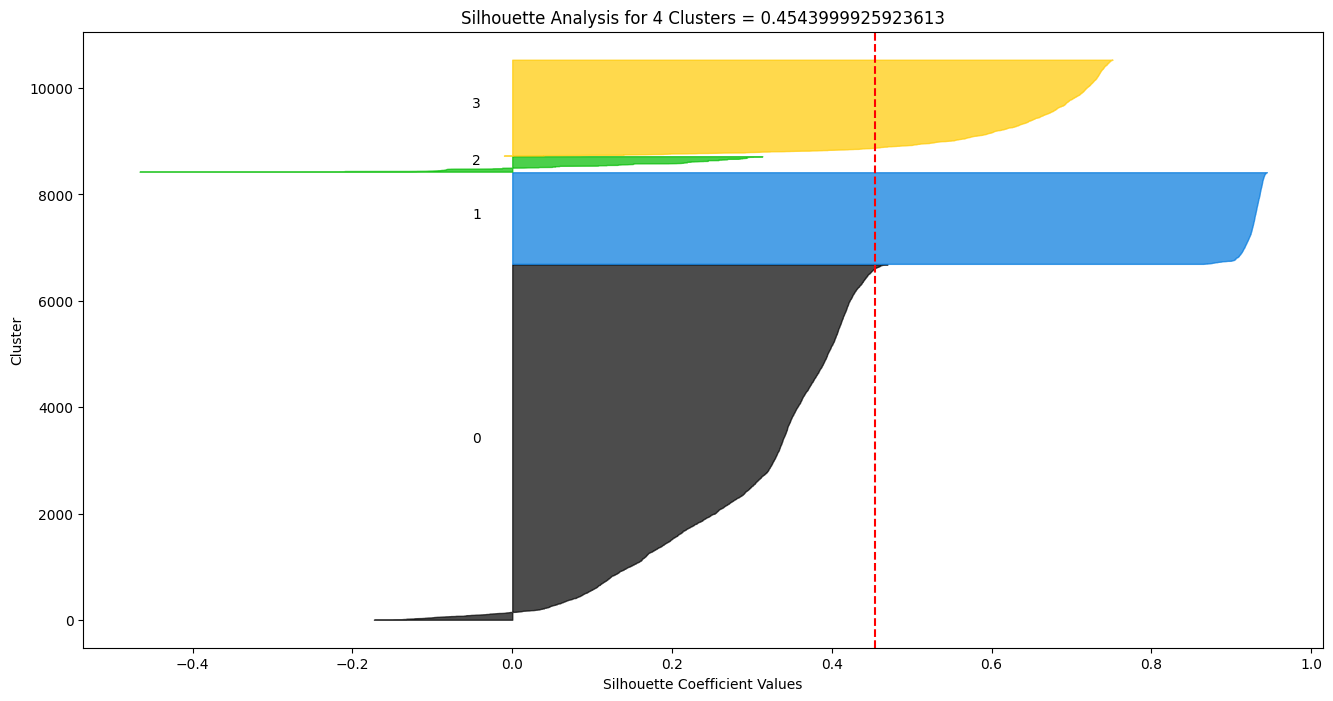

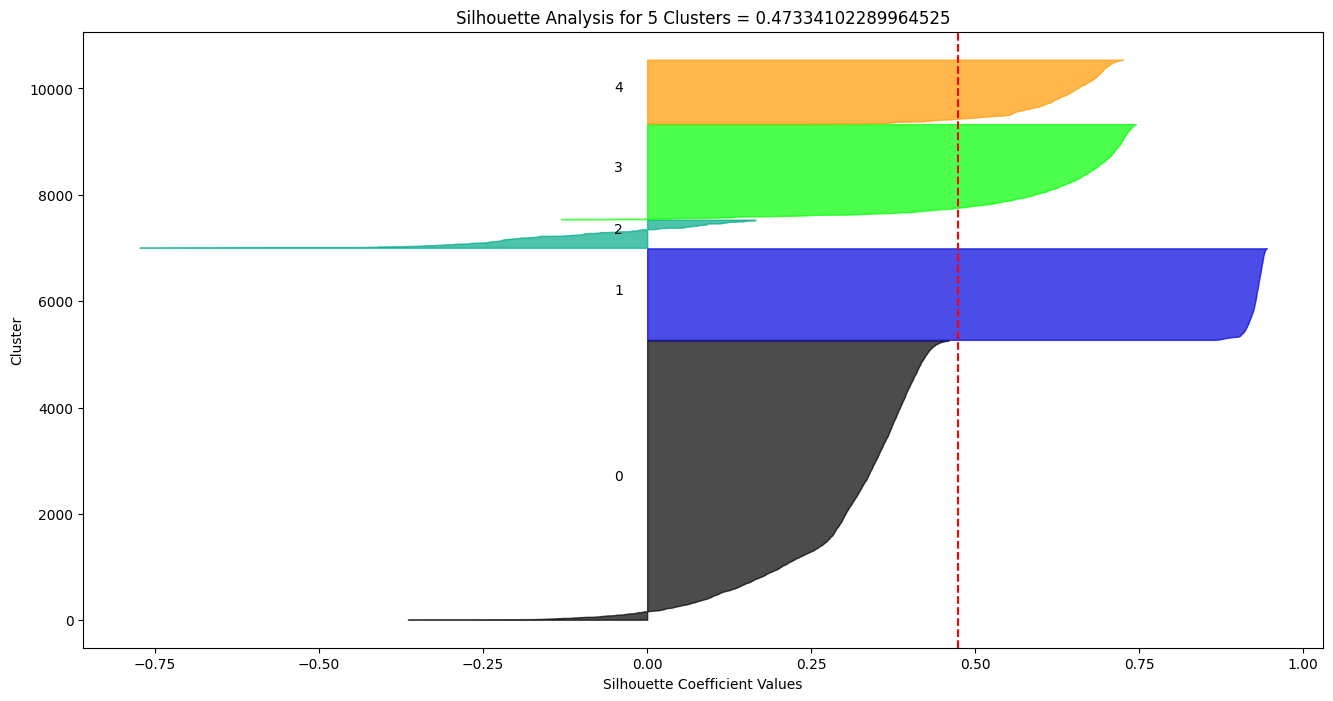

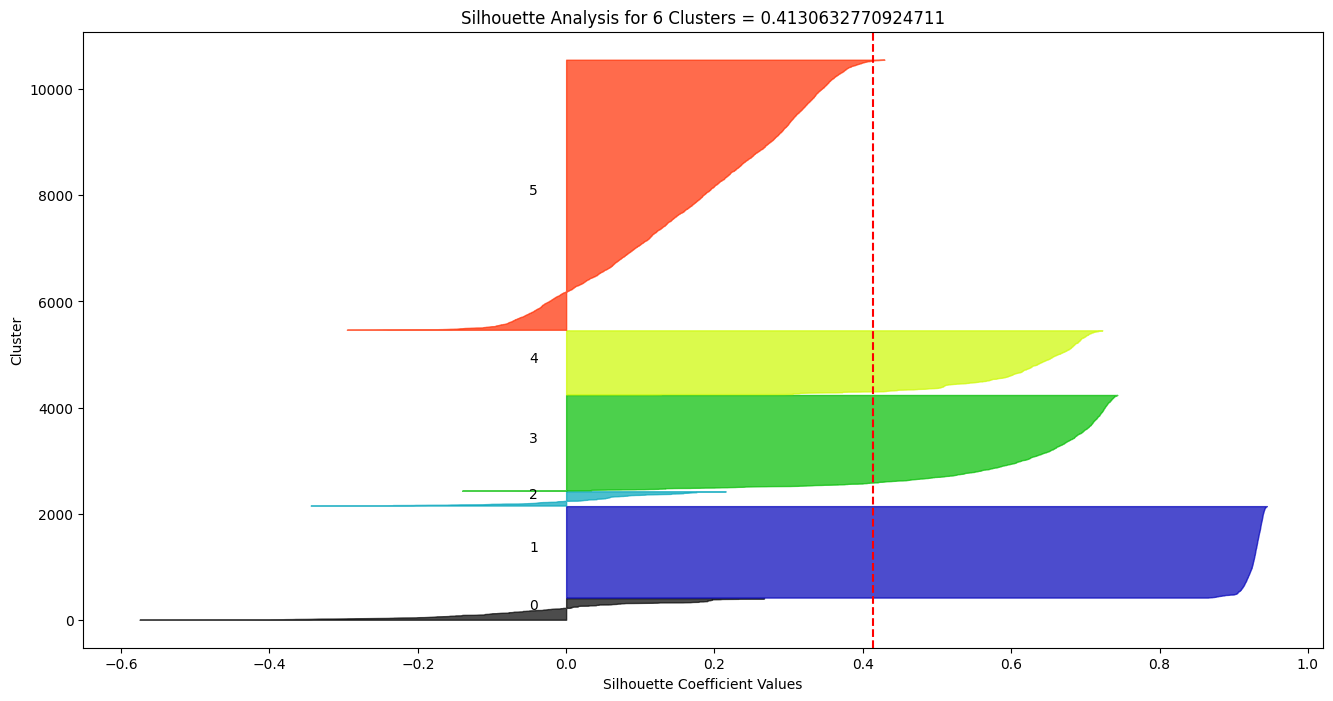

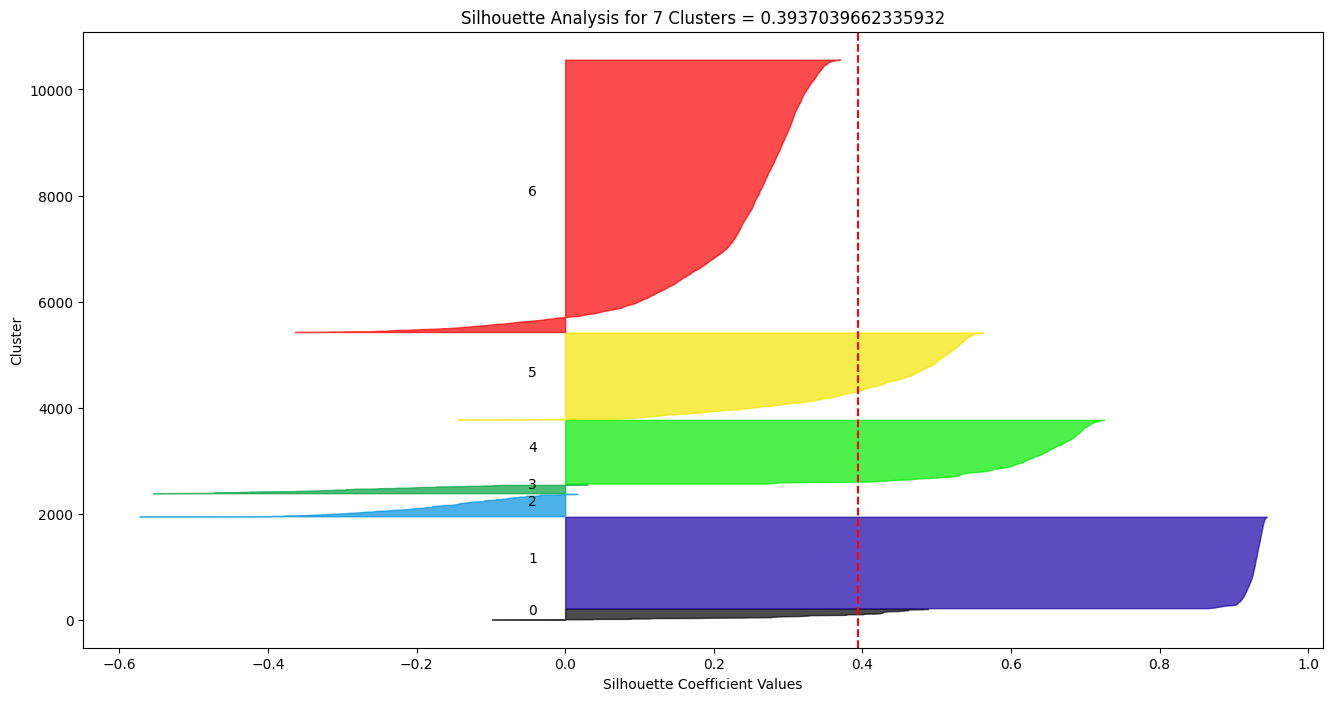

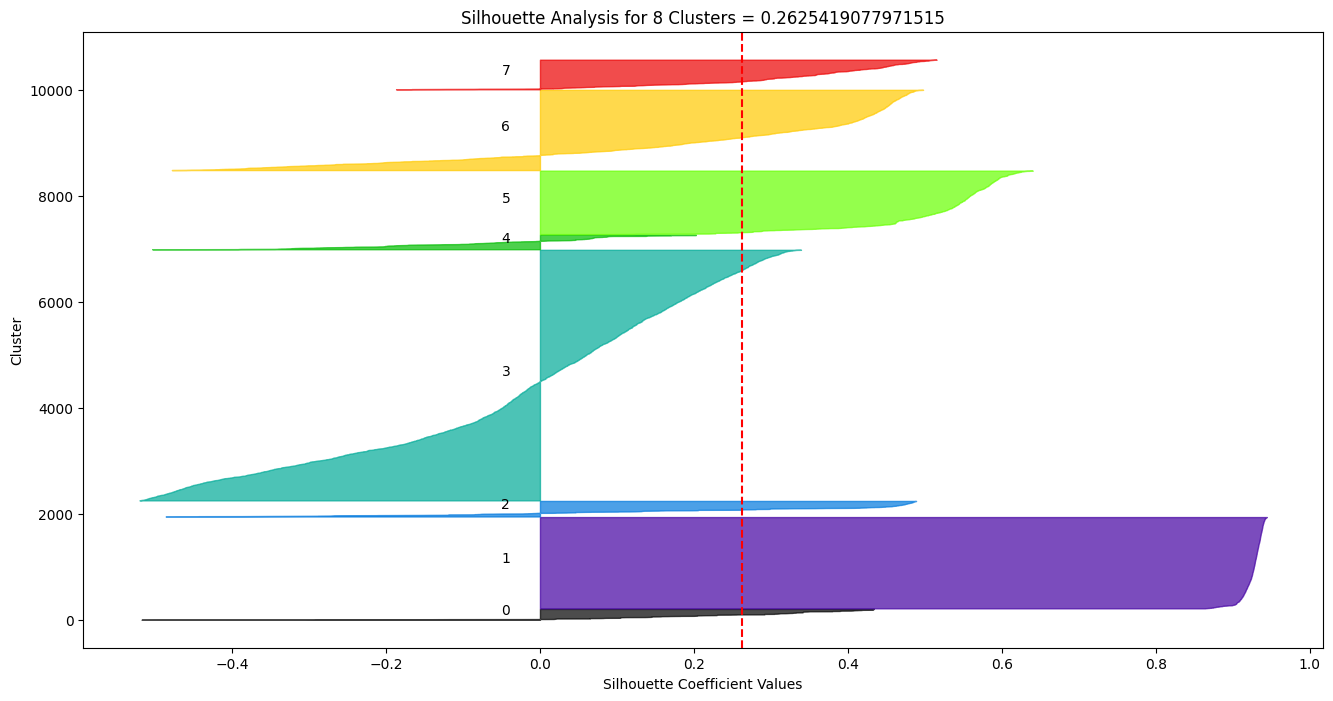

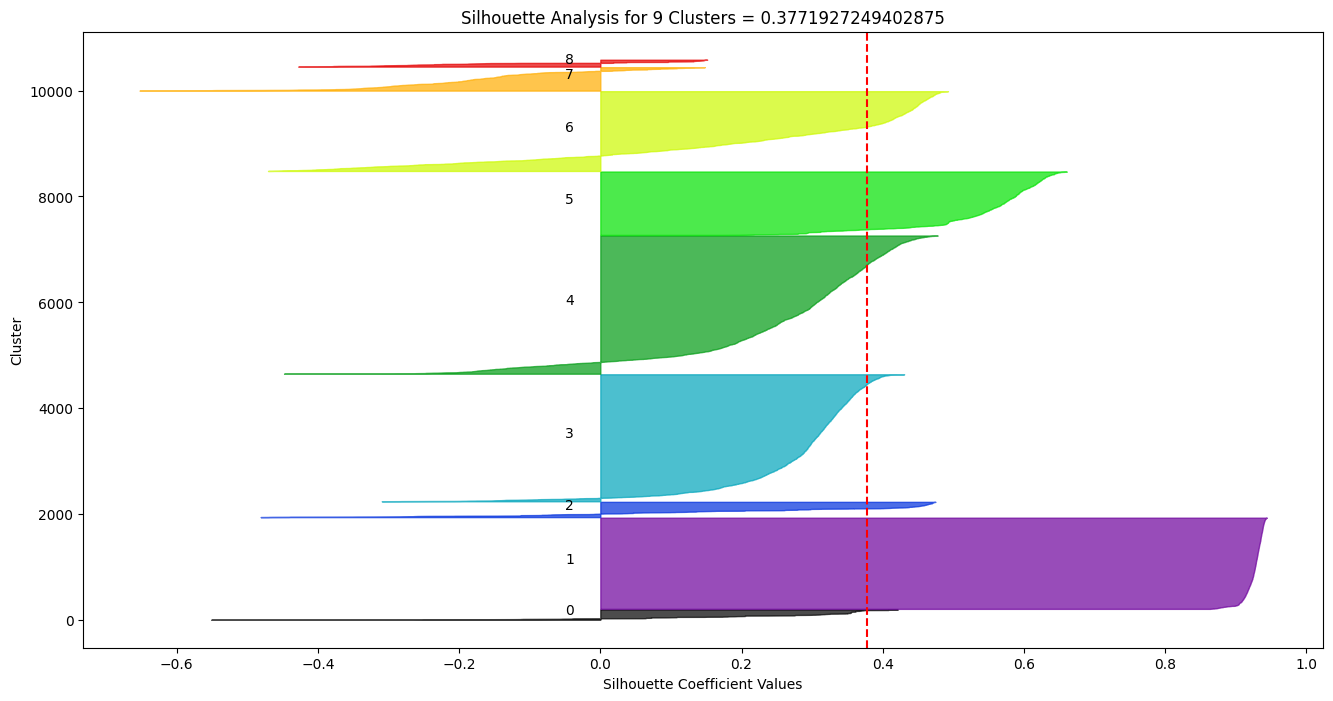

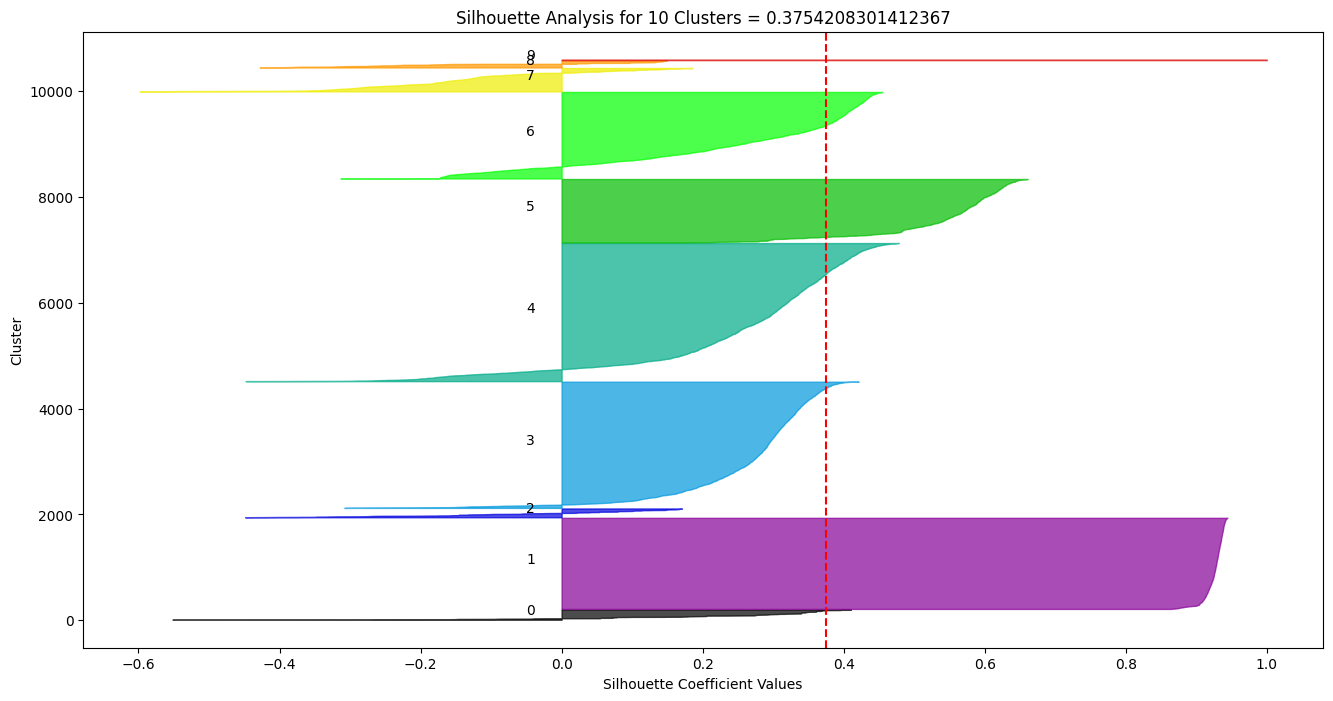

In [4]:
# Range of clusters to evaluate
range_clusters = range(2, 11)

# Initialize lists to store evaluation metrics
aic = []
bic = []
silhouette_scores = []
log_likelihood_values = []
CH_index = []
DB_values = []


silhouette_metrics = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Log-likelihood":[],
    "CH indices":[],
    "Bic (find low)":[],
    "Davies Bouldin (find low)":[]
}

# Loop through each cluster count
for n_clusters in range_clusters:
    # GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_gmm = gmm.fit(umap_df)

    # 1. Calculate log-likelihood
    log_likelihood = cluster_gmm.score(umap_df) * len(umap_df)
    log_likelihood_values.append(log_likelihood)

    # 2. Calculate AIC/BIC
    aic.append(cluster_gmm.aic(umap_df))
    bic.append(cluster_gmm.bic(umap_df))

    # Assign clusters
    cluster_labels = cluster_gmm.predict(umap_df)
    #umap_df['Cluster'] = cluster_labels
    
    # 3. Calculate silhouette scores
    overall_silhouette_avg = silhouette_score(umap_df, cluster_labels)
    silhouette_scores.append(overall_silhouette_avg)
    
    # 4. Calculate CH index
    calinski_harabasz = calinski_harabasz_score(umap_df, cluster_labels)
    CH_index.append(calinski_harabasz)

    # 5. Calculate DB 
    davies_bouldin = davies_bouldin_score(umap_df, cluster_labels)
    DB_values.append(davies_bouldin)

    silhouette_metrics["Number of Clusters"].append(n_clusters)
    silhouette_metrics["Silhouette Score"].append(overall_silhouette_avg)
    silhouette_metrics["Log-likelihood"].append(log_likelihood)
    silhouette_metrics["CH indices"].append(calinski_harabasz)
    silhouette_metrics["Bic (find low)"].append(cluster_gmm.bic(umap_df))
    silhouette_metrics["Davies Bouldin (find low)"].append(davies_bouldin)


    # Visualize silhouette plot
    silhouette_per_sample = silhouette_samples(umap_df, cluster_labels)

    plt.figure(figsize=(16, 8))
    y_lower = 10
    for i in range(n_clusters):
        
        cluster_values = silhouette_per_sample[np.array(cluster_labels) == i]
        cluster_values.sort()

        size_cluster = cluster_values.shape[0]
        y_upper = y_lower + size_cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=overall_silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Analysis for {n_clusters} Clusters = {overall_silhouette_avg}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()


metrics_df_umap = pd.DataFrame(silhouette_metrics)

In [5]:
metrics_df_umap

Number of Clusters  Silhouette Score  Log-likelihood    CH indices  \
0                   2          0.813793   364471.011087  60408.685554   
1                   3          0.550593   462037.615734  54417.023996   
2                   4          0.454400   547549.470532  37746.784676   
3                   5          0.473341   599808.292187  41012.623946   
4                   6          0.413063   605534.591188  34547.364144   
5                   7          0.393704   637975.757999  28769.779781   
6                   8          0.262542   634363.978164  27550.441643   
7                   9          0.377193   648005.846163  32540.163668   
8                  10          0.375421   657920.883444  31658.732547   

   Bic (find low)  Davies Bouldin (find low)  
0   -7.246739e+05                   0.205884  
1   -9.176684e+05                   0.556330  
2   -1.086553e+06                   1.223437  
3   -1.188932e+06                   1.743815  
4   -1.198246e+06                   1.432473  
5   -1.260990e+06                   3.355415  
6   -1.251628e+06                   1.512993  
7   -1.276773e+06                   1.830205  
8   -1.294464e+06                   1.769539

## 3D Visualization


Processing for 2 clusters...

Processing for 3 clusters...

Processing for 4 clusters...

Processing for 5 clusters...

Processing for 6 clusters...

Processing for 7 clusters...

Processing for 8 clusters...

Processing for 9 clusters...

Processing for 10 clusters...


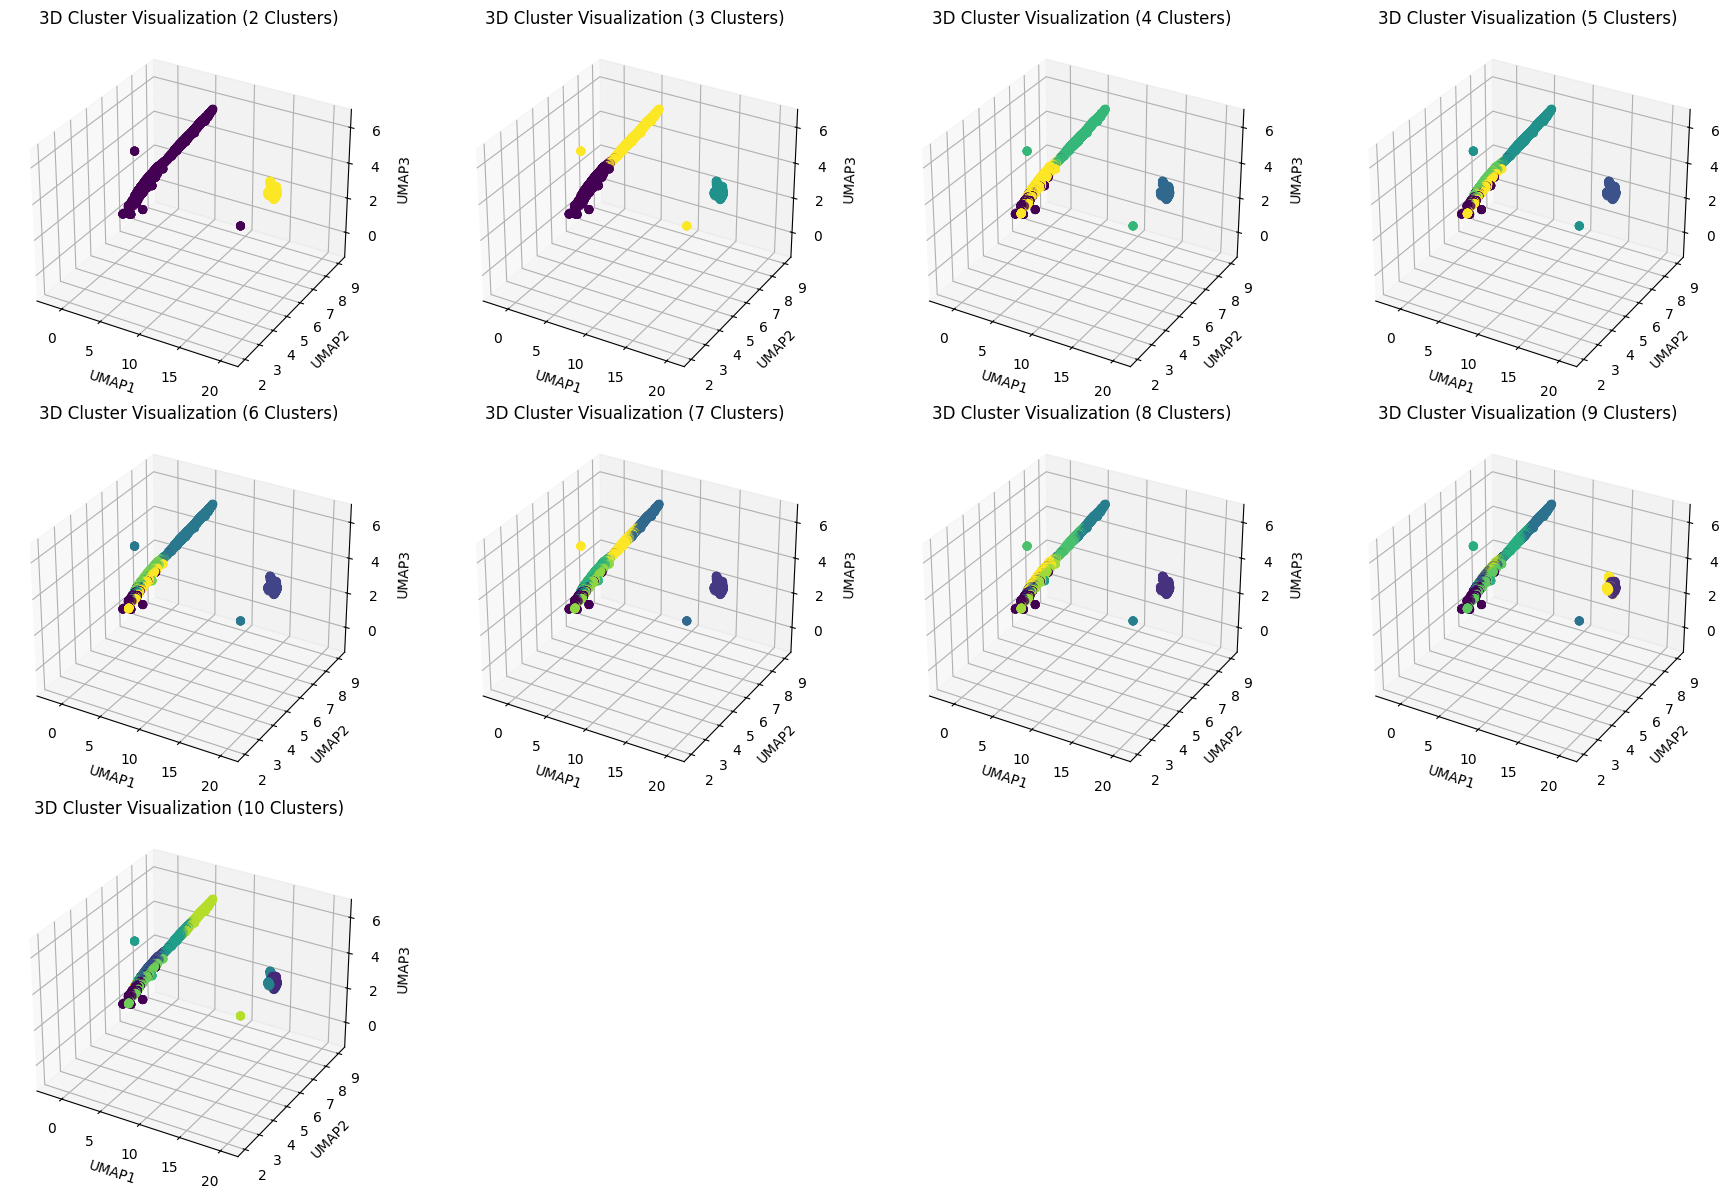

In [6]:
# Define range for clusters (2 to 5)
cluster_range = range(2, 11)

fig = plt.figure(figsize=(18, 12))

for idx, n_clusters in enumerate(cluster_range):
    print(f"\nProcessing for {n_clusters} clusters...")

    # Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    umap_df['Cluster'] = gmm.fit_predict(umap_df)

    # Create 3D subplot
    ax = fig.add_subplot(3, 4, idx + 1, projection='3d')

    # Scatter plot using first 3 PCA components
    scatter = ax.scatter(
        umap_df['UMAP1'], umap_df['UMAP2'], umap_df['UMAP3'],
        c=umap_df['Cluster'], cmap='viridis', s=30, alpha=0.7
    )

    ax.set_title(f'3D Cluster Visualization ({n_clusters} Clusters)')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')

plt.tight_layout()
plt.show()

## TSNE Visualization

Running GMM + t-SNE for 2 clusters...
Running GMM + t-SNE for 3 clusters...
Running GMM + t-SNE for 4 clusters...
Running GMM + t-SNE for 5 clusters...
Running GMM + t-SNE for 6 clusters...
Running GMM + t-SNE for 7 clusters...
Running GMM + t-SNE for 8 clusters...
Running GMM + t-SNE for 9 clusters...
Running GMM + t-SNE for 10 clusters...


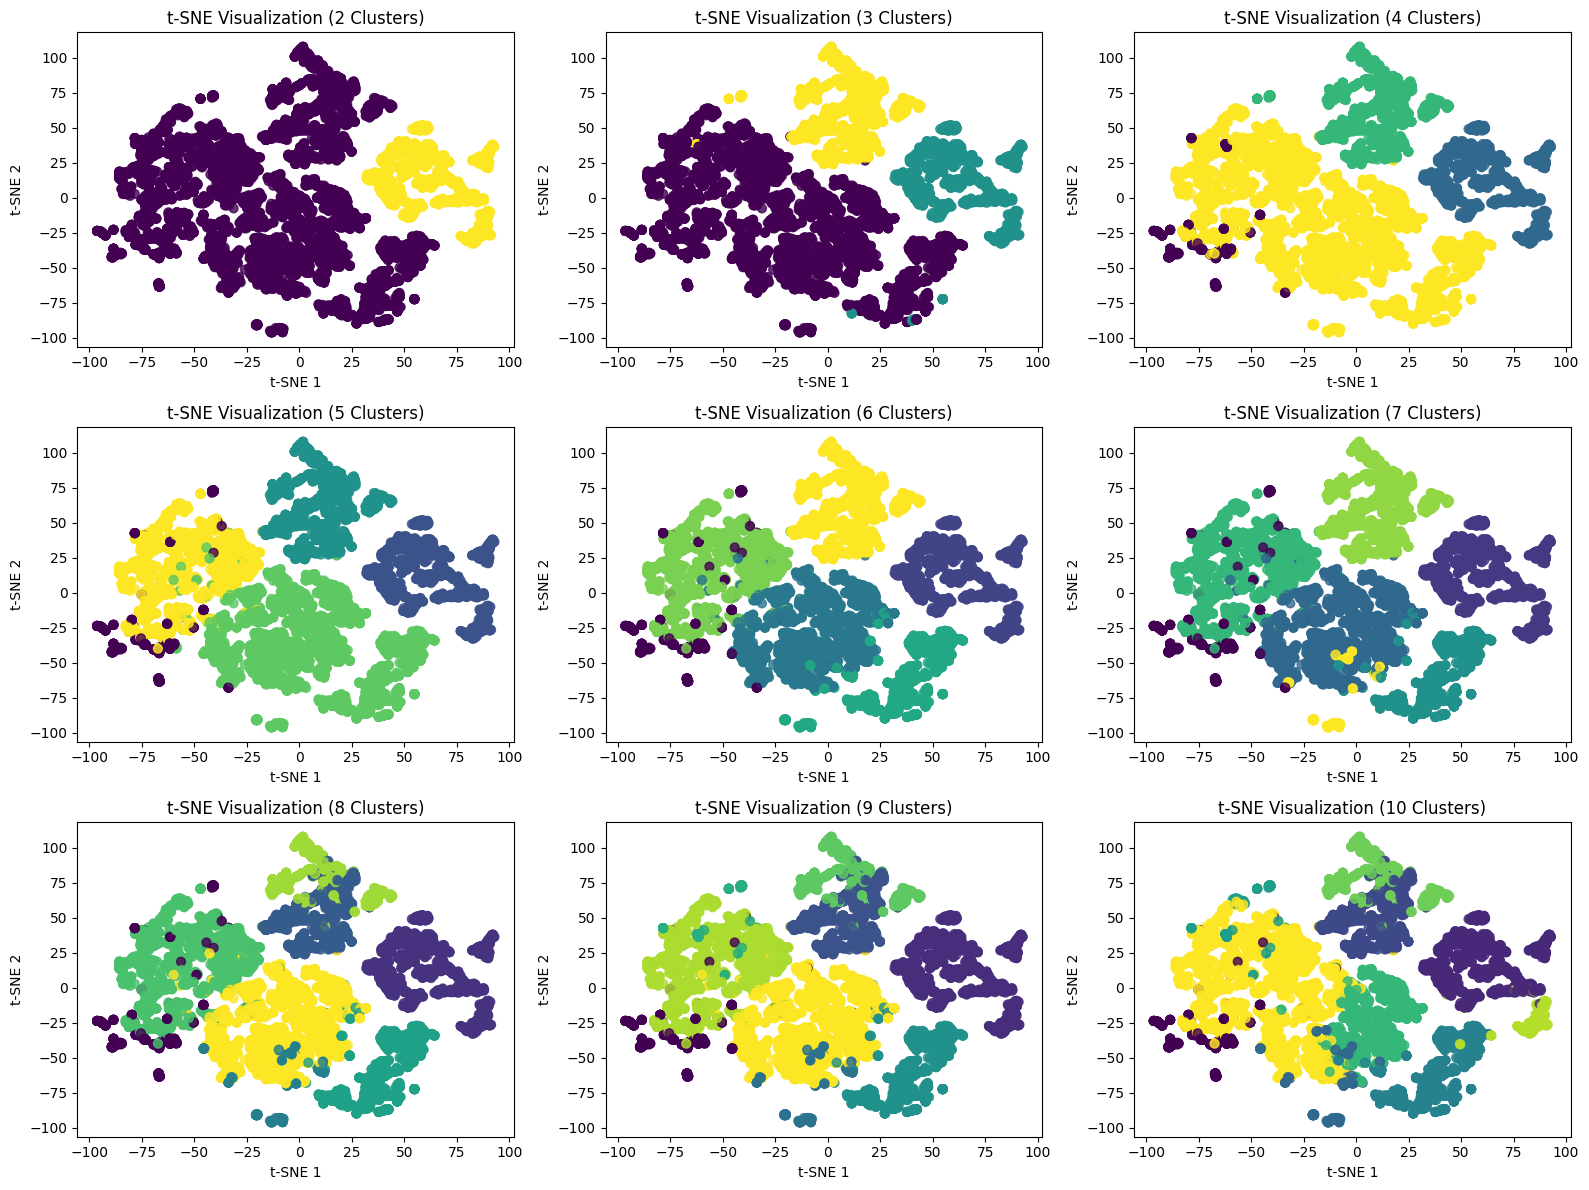

In [ ]:
# Define range for clusters (2 to 5)
cluster_range = range(2, 11)

# Create figure for all subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()


for idx, n_clusters in enumerate(cluster_range):
    print(f"Running GMM + t-SNE for {n_clusters} clusters...")

    # Step 1: Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    umap_df['Cluster'] = gmm.fit_predict(umap_df)

    # Step 2: Run t-SNE (2D projection)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    tsne_result = tsne.fit_transform(umap_df[[f'UMAP{i}' for i in range(1, 21)]])

    # Step 3: Add TSNE coordinates
    umap_df['TSNE1'] = tsne_result[:, 0]
    umap_df['TSNE2'] = tsne_result[:, 1]

    # Step 4: Plot t-SNE scatter
    ax = axes[idx]
    scatter = ax.scatter(
        umap_df['TSNE1'], umap_df['TSNE2'],
        c=umap_df['Cluster'], cmap='viridis', s=40, alpha=0.8
    )
    ax.set_title(f"t-SNE Visualization ({n_clusters} Clusters)")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()


## Summary

In [ ]:
# ==========================================
# 📊 FINAL GMM CLUSTER SUMMARY & VISUALIZATION
# ==========================================

# --- Pick the best number of clusters based on metrics ---
best_n = 4   # Replace with the optimal number determined from previous analysis

# Fit final GMM model
final_gmm = GaussianMixture(n_components=best_n, random_state=42)
umap_df['Final_Cluster'] = final_gmm.fit_predict(umap_df)

print(f"✅ Final model fitted with {best_n} clusters.\n")

# --- 2️Cluster Size Summary ---
cluster_counts = umap_df['Final_Cluster'].value_counts().sort_index()
print("Cluster Size Distribution:")
print(cluster_counts)
print("\n")




✅ Final model fitted with 4 clusters.

Cluster Size Distribution:
Final_Cluster
0     984
1    1811
2    1722
3    5975
Name: count, dtype: int64




## Subclustering

Subset size for subclustering: 5975 rows

📈 Subcluster Model Metrics (Cluster 3):
   n_clusters           BIC           AIC  LogLikelihood
0           2 -35830.637327 -35957.848776       3.012205
1           3 -38242.737610 -38436.902452       3.221331
2           4 -38658.530066 -38919.648301       3.263402
3           5 -39189.827039 -39517.898669       3.315138
4           6 -39332.214032 -39727.239055       3.334330

✅ Optimal number of subclusters inside Cluster 3: 6


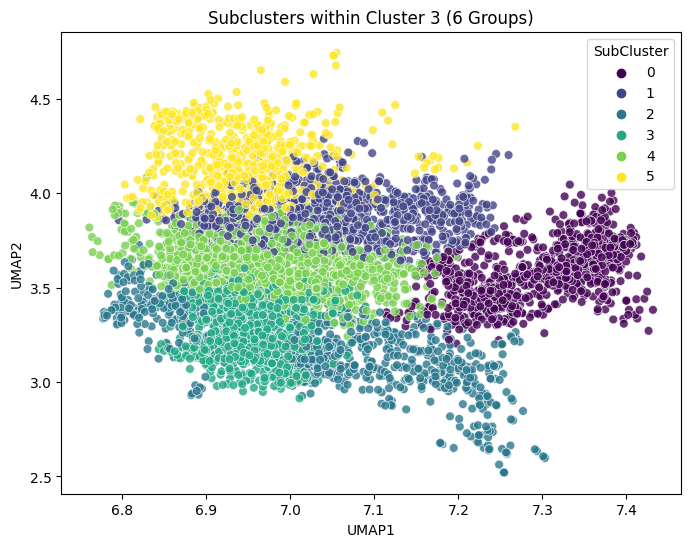

In [ ]:
# Extract the dominant cluster
large_cluster = umap_df[umap_df['Final_Cluster'] == 3].copy()
print(f"Subset size for subclustering: {large_cluster.shape[0]} rows")

# Try a range of subclusters (2–6)
subcluster_range = range(2, 7)
sub_results = []

for n in subcluster_range:
    gmm_sub = GaussianMixture(n_components=n, random_state=42)
    gmm_sub.fit(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']])
    
    # Record key metrics
    sub_results.append({
        'n_clusters': n,
        'BIC': gmm_sub.bic(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']]),
        'AIC': gmm_sub.aic(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']]),
        'LogLikelihood': gmm_sub.score(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']])
    })

# Convert to DataFrame to inspect
sub_metrics = pd.DataFrame(sub_results)
print("\n📈 Subcluster Model Metrics (Cluster 3):")
print(sub_metrics)

# Pick best number based on lowest BIC
best_sub_n = sub_metrics.loc[sub_metrics['BIC'].idxmin(), 'n_clusters']
print(f"\n✅ Optimal number of subclusters inside Cluster 3: {best_sub_n}")

# Fit final subcluster model
final_sub_gmm = GaussianMixture(n_components=int(best_sub_n), random_state=42)
large_cluster['SubCluster'] = final_sub_gmm.fit_predict(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']])

# Visualization of subclusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=large_cluster,
    x='UMAP1', y='UMAP2',
    hue='SubCluster',
    palette='viridis', s=40, alpha=0.8
)
plt.title(f"Subclusters within Cluster 3 ({best_sub_n} Groups)")
plt.show()


In [ ]:
# 🔹 Subset only Cluster 3
cluster3_data = umap_df[umap_df['Final_Cluster'] == 3].copy()

# 🔹 Fit sub-GMM
sub_n = 6
gmm_sub = GaussianMixture(n_components=sub_n, random_state=42)
cluster3_data['Subcluster'] = gmm_sub.fit_predict(cluster3_data[['UMAP1', 'UMAP2', 'UMAP3']])

print(f"✅ Sub-GMM fitted with {sub_n} subclusters inside Cluster 3.")
print(cluster3_data['Subcluster'].value_counts().sort_index())


✅ Sub-GMM fitted with 6 subclusters inside Cluster 3.
Subcluster
0     893
1    1077
2     730
3    1182
4    1373
5     720
Name: count, dtype: int64


In [13]:
# Copy main df so we don't overwrite original
umap_all = umap_df.copy()

# Initialize Subcluster as 'Main'
umap_all['Subcluster'] = 'Main'

# Fill in subcluster labels only for cluster 3 samples
umap_all.loc[umap_all['Final_Cluster'] == 3, 'Subcluster'] = (
    '3.' + cluster3_data['Subcluster'].astype(str)
)


## Clusters + Subclusters Visualization

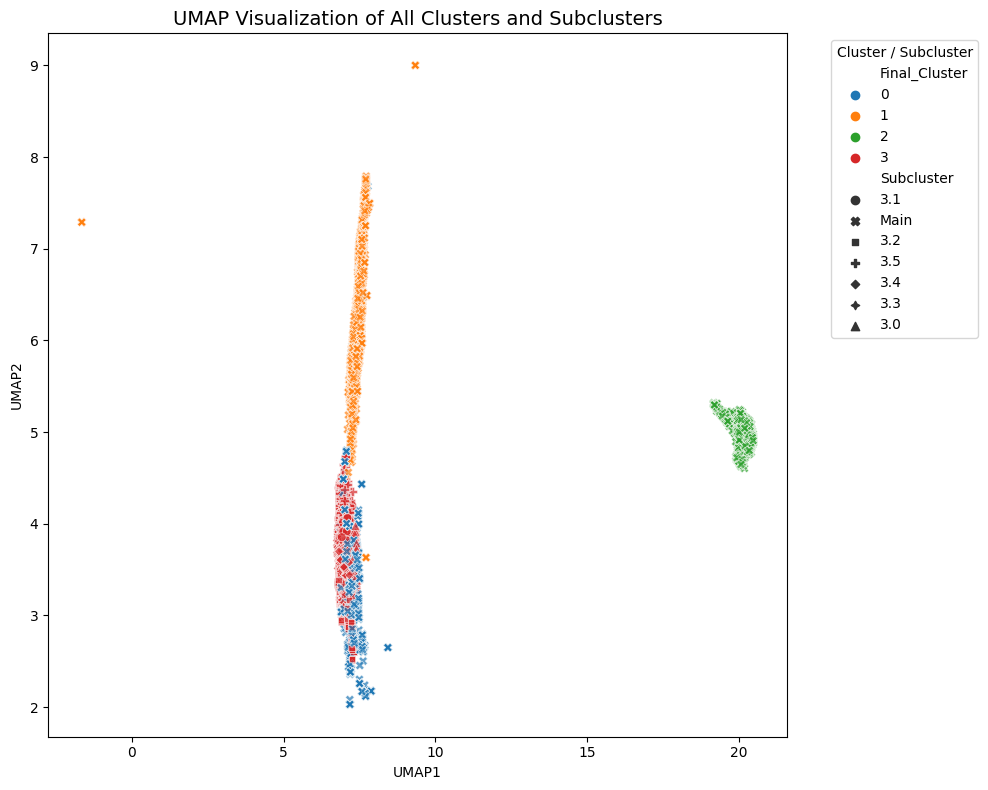

In [14]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data=umap_all,
    x='UMAP1', y='UMAP2',
    hue='Final_Cluster',
    style='Subcluster',  # Different markers for subclusters
    palette='tab10',
    s=40, alpha=0.7
)

plt.title("UMAP Visualization of All Clusters and Subclusters", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster / Subcluster')
plt.tight_layout()
plt.show()


## 3D Visualization for Main + Sub clusters

In [ ]:
fig = px.scatter_3d(
    umap_all,
    x='UMAP1', y='UMAP2', z='UMAP3',
    color='Final_Cluster',
    symbol='Subcluster',
    color_continuous_scale='Viridis',
    title='Interactive 3D UMAP: Clusters and Subclusters',
    hover_data=['Final_Cluster', 'Subcluster']  # optional, shows when hovering
)

fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.update_layout(
    legend=dict(title='Cluster / Subcluster', itemsizing='trace'),
    scene=dict(
        xaxis_title='UMAP1',
        yaxis_title='UMAP2',
        zaxis_title='UMAP3'
    )
)

fig.show()


c:\Users\varsh\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


## Zoomed In View of Subcluster

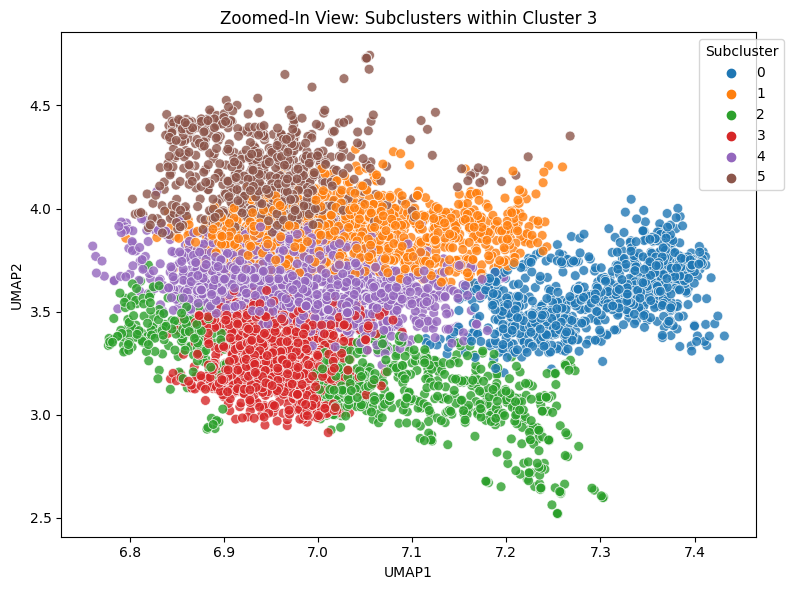

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=cluster3_data,
    x='UMAP1', y='UMAP2',
    hue='Subcluster',
    palette='tab10',
    s=50, alpha=0.8
)
plt.title("Zoomed-In View: Subclusters within Cluster 3")
plt.legend(title='Subcluster', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


## Final Cluster Percentages

In [41]:
# Create unified cluster labels as strings
umap_all['Cluster_Label'] = umap_all.apply(
    lambda row: str(row['Final_Cluster']) if row['Final_Cluster'] != 3 
    else str(row['Final_Cluster']) + '-->' + str(row['Subcluster']),
    axis=1
)

# Calculate percentages
cluster_pct = (
    umap_all['Cluster_Label']
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
)

print("📊 Percentage of Samples in Each Cluster / Subcluster:")
print(cluster_pct)


📊 Percentage of Samples in Each Cluster / Subcluster:
Cluster_Label
0           9.38
1          17.26
2          16.41
3-->3.0     8.51
3-->3.1    10.26
3-->3.2     6.96
3-->3.3    11.27
3-->3.4    13.09
3-->3.5     6.86
Name: proportion, dtype: float64
